In [123]:
import numpy as np

#1a
L_sun = 3.8E26 #W
pi = np.pi
d = 1.5E11 #m
A = 0.3
sigma = 5.67 * (10 ** -8)

F_surf = L_sun/(4.*pi*d*d)
print "F_surface =", F_surf, "W/m^2"

F_earth = (1. - A)*F_surf/4.
print "F_earth =", F_earth, "W/m^2"

T_earth = (F_earth/sigma)**(.25)
print "T_earth =", T_earth, "K"

F_surface = 1343.975075 W/m^2
F_earth = 235.195638125 W/m^2
T_earth = 253.782429752 K


In [125]:
#1b
F_new = ((1. - A)*(F_surf+4.*sigma*(T_earth**4)))/4.
print "F_earth_new =", F_new, "W/m^2"

T_new = (F_new/sigma)**(.25)
print "T_earth_new =", T_new, "K"
#high temp OK

F_earth_new = 399.832584812 W/m^2
T_earth_new = 289.783585337 K


In [35]:
#1c
# Fs = pi*integral(0->inf.)[(1-a(lambda))*B(lambda,T)dlambda]

In [94]:
#1d
'''
The part of the equation that shows the increased concentration of greenhouse gasses
is the a(lambda) part. Water vapor is the most common greenhouse gas, and water vapor is
the most problematic.'''

'\nThe part of the equation that shows the increased concentration of greenhouse gasses\nis the a(lambda) part. Carbon is the most common greenhouse gas, but water vapor is\nthe most problematic.'

In [37]:
#1e
'''
Yes, the amount of CO2 in our atmosphere has increased sharply in terms of ppm, especially
in recent history.
'''

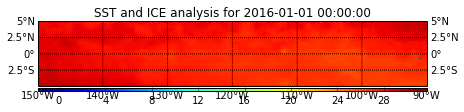

In [118]:
#2
#year, T, precip, snowdep, NINO3  = np.loadtxt("calidata_final.txt", skiprows = 1, usecols = (1, 2, 3, 4, 5), unpack = True)

from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset, date2index
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

date = datetime(2016,1,1,0) # date to plot.
# open dataset.
dataset = \
Dataset('http://www.ncdc.noaa.gov/thredds/dodsC/OISST-V2-AVHRR_agg')
timevar = dataset.variables['time']
timeindex = date2index(date,timevar) # find time index for desired date.
# read sst.  Will automatically create a masked array using
# missing_value variable attribute. 'squeeze out' singleton dimensions.
sst = dataset.variables['sst'][timeindex,:].squeeze()
# read ice.
ice = dataset.variables['ice'][timeindex,:].squeeze()
# read lats and lons (representing centers of grid boxes).
#need to change lats, lons
lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]
lons, lats = np.meshgrid(lons,lats)
# create figure, axes instances.
fig = plt.figure()
ax = fig.add_axes([0.05,0.05,0.9,0.9])
# create Basemap instance.
# coastlines not used, so resolution set to None to skip
# continent processing (this speeds things up a bit)
m = Basemap(llcrnrlon=-150,llcrnrlat=-5,urcrnrlon=-90,urcrnrlat=5,projection='mill')
# draw line around map projection limb.
# color background of map projection region.
# missing values over land will show up this color.
m.drawmapboundary(fill_color='0.3')
# plot sst, then ice with pcolor
im1 = m.pcolormesh(lons,lats,sst,shading='flat',cmap=plt.cm.jet,latlon=True)
im2 = m.pcolormesh(lons,lats,ice,shading='flat',cmap=plt.cm.gist_gray,latlon=True)
# draw parallels and meridians, but don't bother labelling them.
m.drawparallels(np.arange(-90.,90.,2.5),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,10.),labels=[1,1,0,1])
# add colorbar
cb = m.colorbar(im1,"bottom", size="5%", pad="2%")
# add a title.
ax.set_title('SST and ICE analysis for %s'%date)
plt.show()

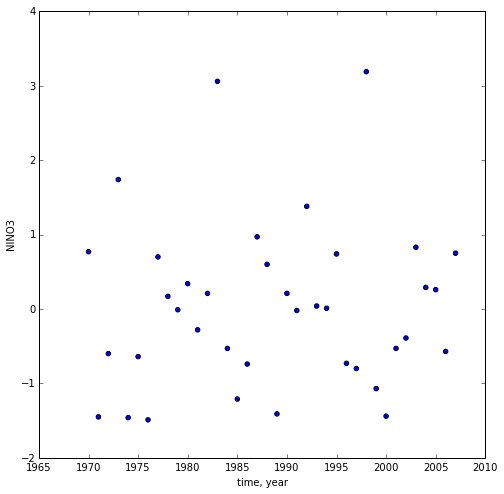

In [106]:
#2b
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

year, T, precip, snow, NINO3  = np.loadtxt("calidata_final.txt", skiprows = 1, usecols = (0, 1, 2, 3, 4), unpack = True)

fig = plt.figure(1, figsize=(8,8))

ax1 = fig.add_subplot(111)
ax1.scatter(year, NINO3)
ax1.set_xlabel("time, year")
ax1.set_ylabel("NINO3")

plt.show()

In [128]:
#c
import heapq
import numpy
heapq.nlargest(5, range(len(NINO3)), NINO3.take)

new_list = []
for item in year:
    new_list.append(int(item))
    
year = new_list

print "The largest el nino events occurred in the years", year[28],",", year[13],",", year[3],",",year[22],", and,",year[17]


The largest el nino events occurred in the years 1998 , 1983 , 1973 , 1992 , and, 1987


In [86]:
#d
'''Looking at the top 15 weather events of the 1900s, many of them match up. There were large
1983 storms that were related to el nino. There were also weather events at the very end of
the years before el nino years. For example, 1997 New Years Flood occurred right before an el
nino year. '''

In [127]:
#e
import scipy

r_Trow, p_Tvalue= scipy.stats.pearsonr(T, NINO3)
print "r_Trow=", r_Trow
#print p_Tvalue

r_preciprow, p_precipvalue = scipy.stats.pearsonr(precip, NINO3)
print "r_preciprow=", r_preciprow
#print p_precipvalue

r_snowrow, p_snowvalue = scipy.stats.pearsonr(snow, NINO3)
print "r_snowrow=", r_snowrow
#print p_snowvalue

'''Temperature is not correlated to el nino years. However, precipitation is correlated
and snow is weakly correlated. This is consistent, there is an increase in precipitation 
in el nino years.'''

r_Trow= 0.00511244585807
r_preciprow= 0.37712170126
r_snowrow= 0.141972307605


In [ ]:
#f
'''
The data shows the temperature of the water over the ocean in the el nino region. 
We are currently in a warming event, which we can see by how warm the water over
that region is.
'''
